# 2021-12-27 Implementing HIKER scenarios

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/55d6d48f50bbdaaf45aab49b1cee4ae72e6ec4ab (Rerunning the code below for other commits is not likely/guaranteed to give the same results.)

I have now:
* Added a class `sc_fitting.HIKERScenario`, inheriting from `sc_fitting.SCPaperScenario`; also had to make some changes to that ancestor class and in `SCAgent` and `SCSimulation` to allow for the HIKER scenarios:
    * Support for piecewise constant predetermined accelerations.
    * Support for inhibiting first-passing before a certain time in the simulation, to emulate presence of the first vehicle in the HIKER scenarios.
* Modified how `SCAgent.prepare_for_simulation()` sets the `conflict_point` attribute of `commotions.Simulation`. Previously this was calculated from the agent initial positions and goals, now I have hardcoded it to (0, 0) instead, with an assertion checking that the calculated value is very close to (0, 0) - as a verification that the SC scenario has been set up as expected. I did this because while setting up the HIKER scenarios I discovered that a `conflict_point` that got calculated to something very close to but not quite (0, 0) could put the pedestrian at a starting point just past its $D_s$ safety distance to the crossing, such that passing in second was no longer an option. Overall, the way I treat safety distances etc is a little brittle, so it would be nice to have some better solution in general, but for now this fixes this specific problem. This change might of course have an effect on previously run fits, especially the deterministic ones - especially the priority assertion / short-stopping ones? But I don't think so, given what they looked like? (If it didn't seem to the vehicle that the pedestrian could at all pass in second, then the probability of the pedestrian's pass-second behaviour should have been zero, etc?)
* Modified `sc_scenario_helper.get_access_order_values()` such that any non-zero $T_\mathrm{acc}$ get set to at least `sc_scenario_helper.ANTICIPATION_TIME_STEP`, because while testing the HIKER scenarios I was again seeing cases where a very large acceleration was anticipated by the pedestrian in order to pass before the car, but for a very brief $T_\mathrm{acc}$, such that this didn't show up in the value calculation. Adding this requirement fixed this problem. Unfortunately, this model implementation imperfection seems to have underpinned some of the `oVAoBE*` models' capability of having pedestrians cross before full vehicle stop... Unclear to what extent.

## Testing through all scenarios

Running through all scenarios with the `oVAoBEvoAI` model parameterisation which met all four deterministic criteria in the latest ARC4 fits ($T_\delta$ = 59.95 s;
$\beta_V$ = 18.98), to verify that the scenarios look like they should. I have also looked more in detail at the new HIKER scenarios, to verify that vehicle distances at deceleration onset and end are correct. All is looking good, except for the lack of early onset crossing in the `PedCrossVehYield` scenario, as mentioned above.


*** Looping through dict_keys(['VehPrioAssert', 'VehShortStop', 'PedHesitateVehConst', 'PedHesitateVehYield', 'PedCrossVehYield']):

VehPrioAssert variation 1/3:
Initialising and running simulation took 0.034 s.


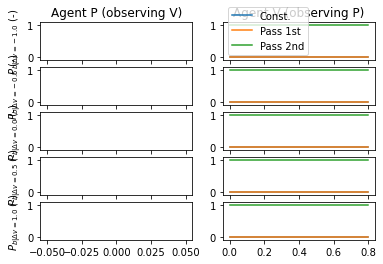

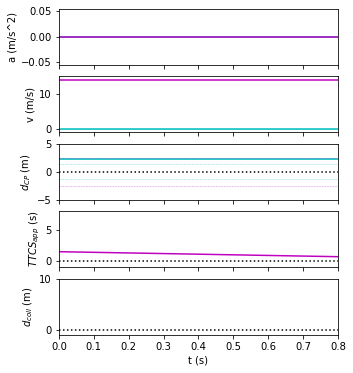

Metric VehPrioAssert_veh_av_speed = 13.88888888888889

VehPrioAssert variation 2/3:
Initialising and running simulation took 0.055 s.


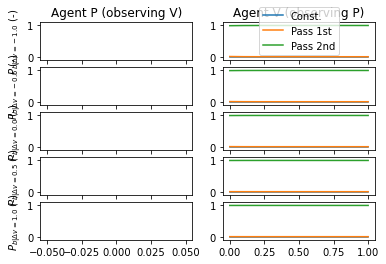

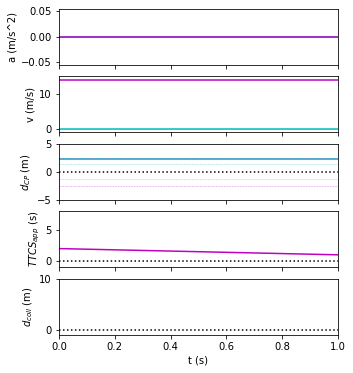

Metric VehPrioAssert_veh_av_speed = 13.88888888888889

VehPrioAssert variation 3/3:
Initialising and running simulation took 0.068 s.


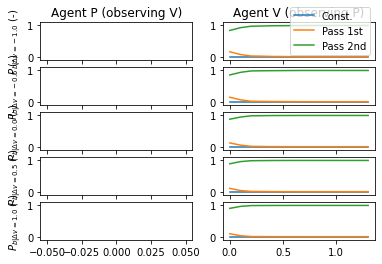

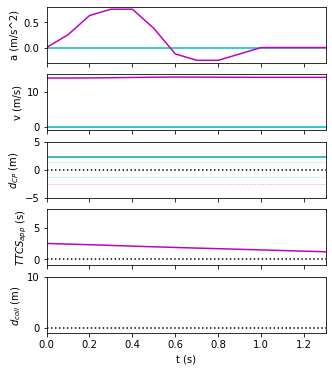

Metric VehPrioAssert_veh_av_speed = 14.050427350427352

VehShortStop variation 1/3:
Initialising and running simulation took 0.157 s.


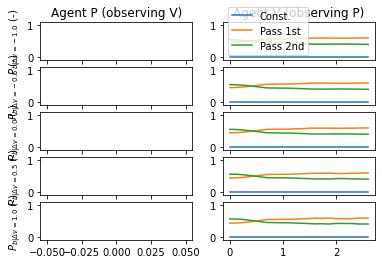

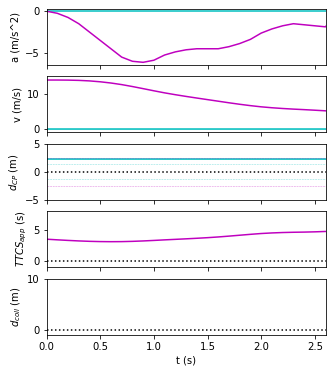

Metric VehShortStop_veh_av_surpl_dec = 2.7547112106093246

VehShortStop variation 2/3:
Initialising and running simulation took 0.178 s.


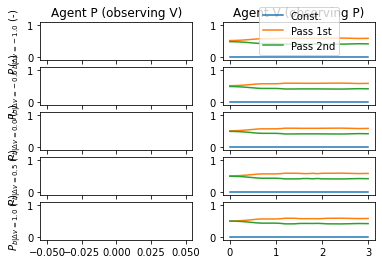

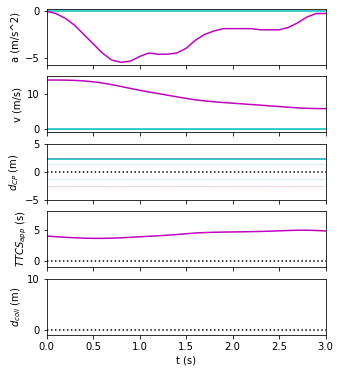

Metric VehShortStop_veh_av_surpl_dec = 2.0087754967824725

VehShortStop variation 3/3:
Initialising and running simulation took 0.179 s.


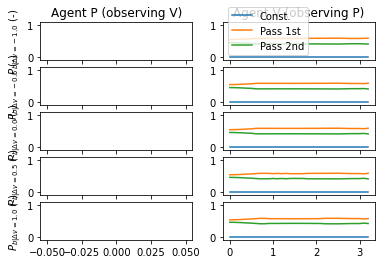

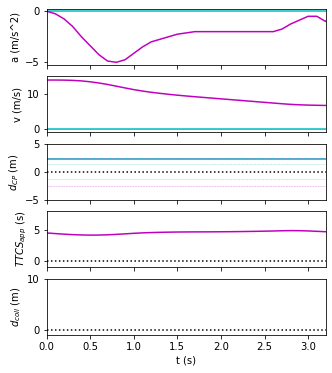

Metric VehShortStop_veh_av_surpl_dec = 1.4416040370399976

PedHesitateVehConst variation 1/3:
Initialising and running simulation took 0.092 s.


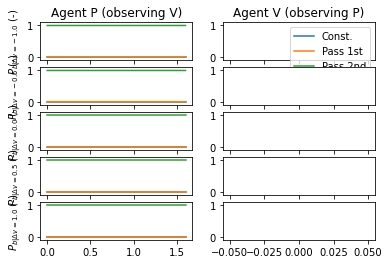

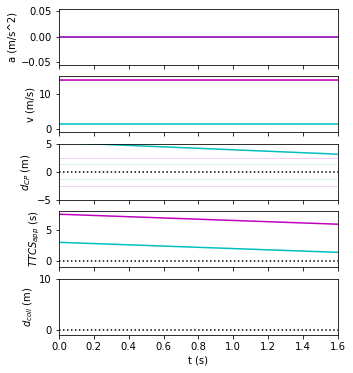

Metric PedHesitateVehConst_ped_av_speed = 1.3

PedHesitateVehConst variation 2/3:
Initialising and running simulation took 0.101 s.


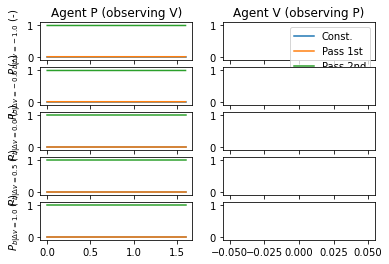

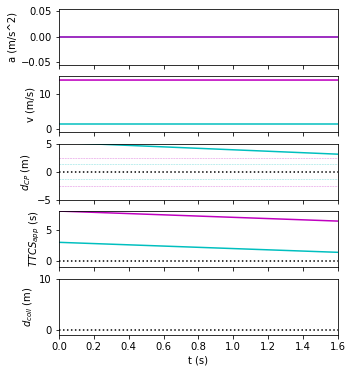

Metric PedHesitateVehConst_ped_av_speed = 1.3

PedHesitateVehConst variation 3/3:
Initialising and running simulation took 0.089 s.


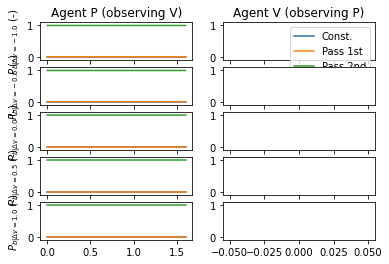

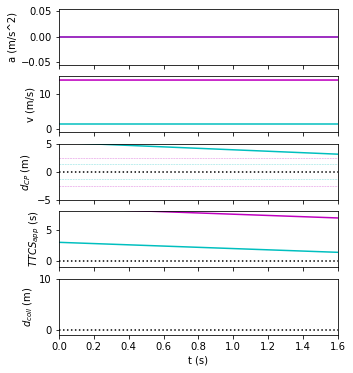

Metric PedHesitateVehConst_ped_av_speed = 1.3

PedHesitateVehYield variation 1/3:
Initialising and running simulation took 0.343 s.


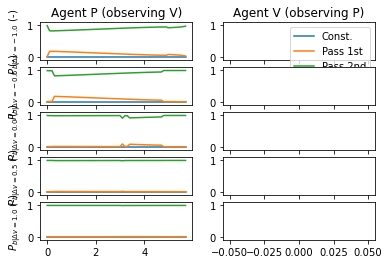

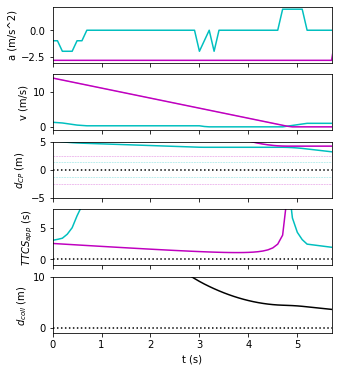

Metric PedHesitateVehYield_ped_av_speed = 0.35789473684210527

PedHesitateVehYield variation 2/3:
Initialising and running simulation took 0.402 s.


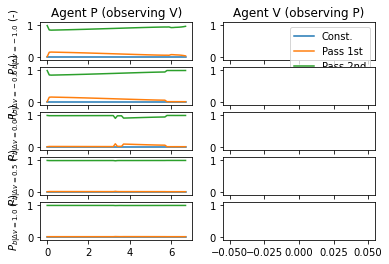

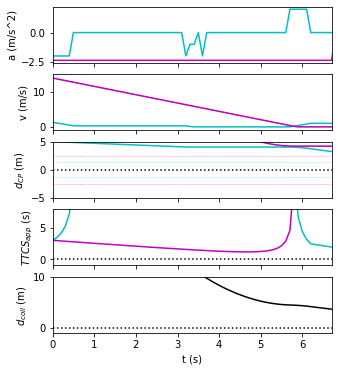

Metric PedHesitateVehYield_ped_av_speed = 0.29850746268656725

PedHesitateVehYield variation 3/3:
Initialising and running simulation took 0.458 s.


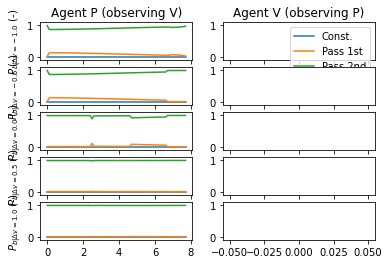

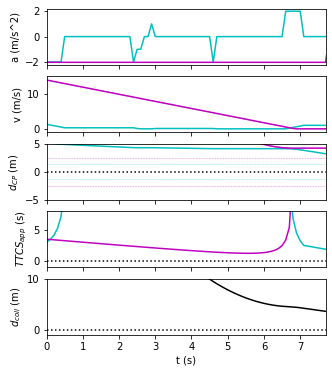

Metric PedHesitateVehYield_ped_av_speed = 0.2636363636363637

PedCrossVehYield variation 1/3:
Initialising and running simulation took 0.151 s.


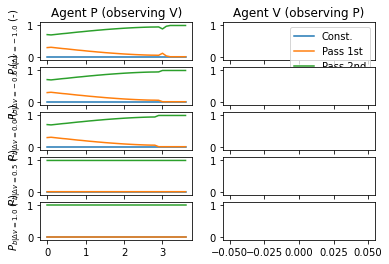

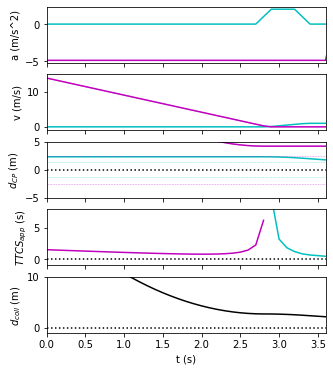

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0

PedCrossVehYield variation 2/3:
Initialising and running simulation took 0.209 s.


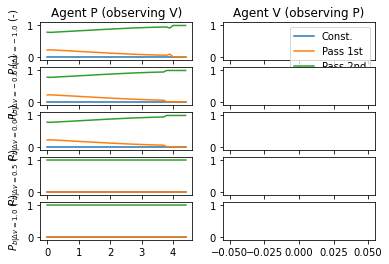

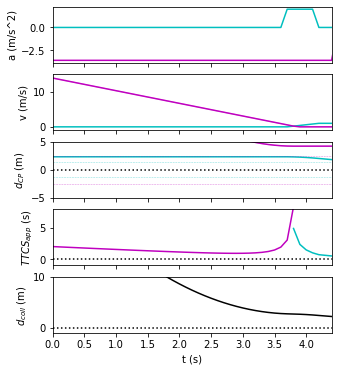

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0

PedCrossVehYield variation 3/3:
Initialising and running simulation took 0.265 s.


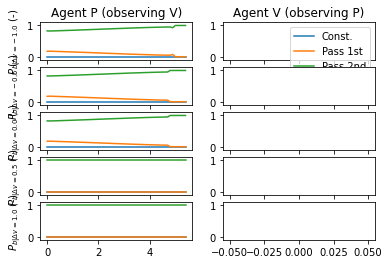

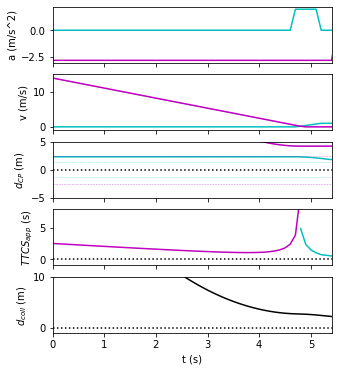

Metric PedCrossVehYield_veh_speed_at_ped_start = 0.0

*** Looping through dict_keys(['Encounter', 'EncounterPedPrio', 'PedLead', 'PedHesitateVehConst']):

Encounter variation 1/1:
Initialising and running simulation took 2.131 s.


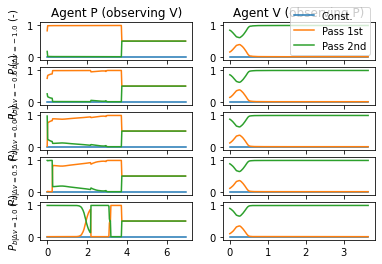

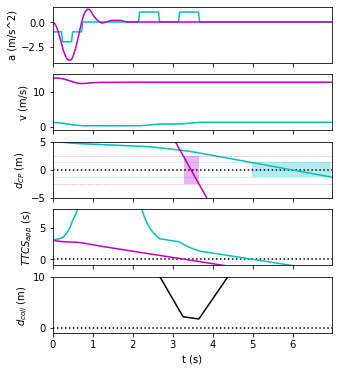

Metric Encounter_collision = False
Metric Encounter_ped_exit_time = 6.9750000000000005
Metric Encounter_veh_exit_time = 3.6750000000000003

EncounterPedPrio variation 1/1:
Initialising and running simulation took 2.924 s.


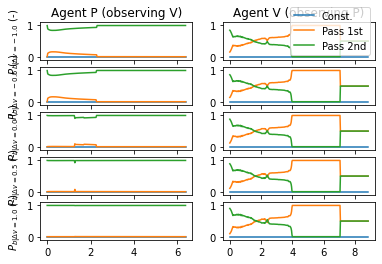

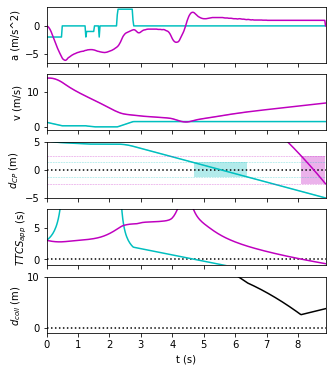

Metric EncounterPedPrio_collision = False
Metric EncounterPedPrio_ped_exit_time = 6.4
Metric EncounterPedPrio_veh_exit_time = 8.875

PedLead variation 1/1:
Initialising and running simulation took 2.185 s.


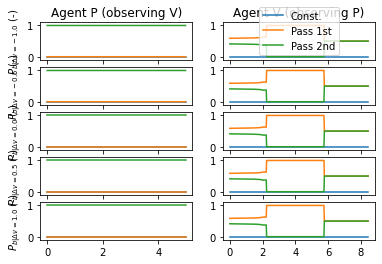

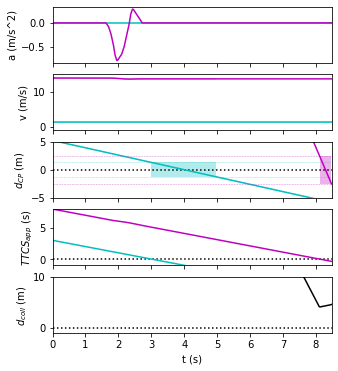

Metric PedLead_collision = False
Metric PedLead_ped_exit_time = 5.0
Metric PedLead_veh_exit_time = 8.475

PedHesitateVehConst variation 1/1:
Initialising and running simulation took 0.551 s.


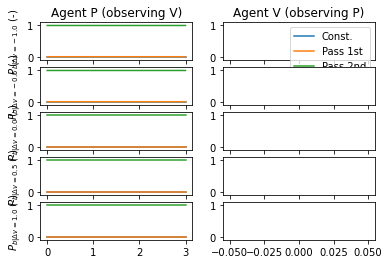

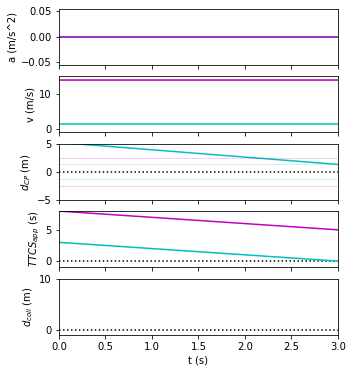

Metric PedHesitateVehConst_ped_av_speed_to_CS = 1.3000000000000003

*** Looping through dict_keys(['25_2', '25_2_y', '25_3', '25_3_y', '25_4', '25_4_y', '25_5', '25_5_y', '30_2', '30_2_y', '30_3', '30_3_y', '30_4', '30_4_y', '30_5', '30_5_y', '35_2', '35_2_y', '35_3', '35_3_y', '35_4', '35_4_y', '35_5', '35_5_y']):

25_2 variation 1/1:
Initialising and running simulation took 0.987 s.


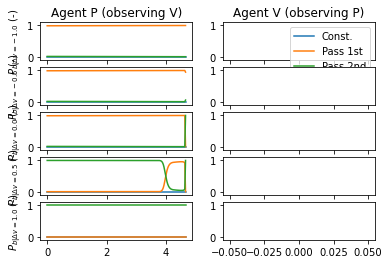

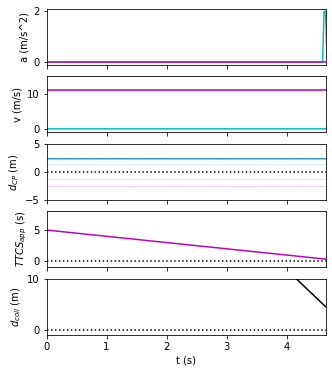


25_2_y variation 1/1:
Initialising and running simulation took 1.642 s.


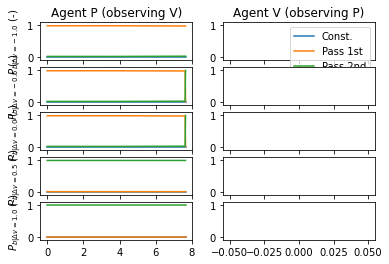

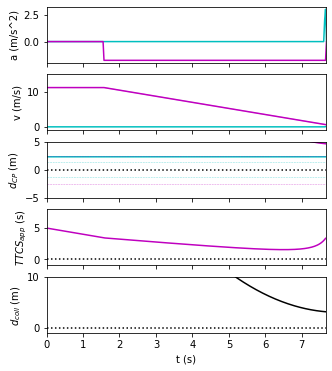


25_3 variation 1/1:
Initialising and running simulation took 1.140 s.


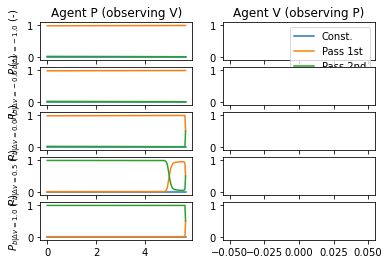

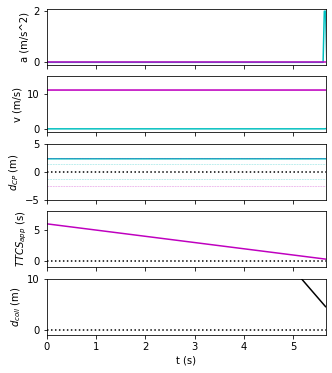


25_3_y variation 1/1:
Initialising and running simulation took 1.719 s.


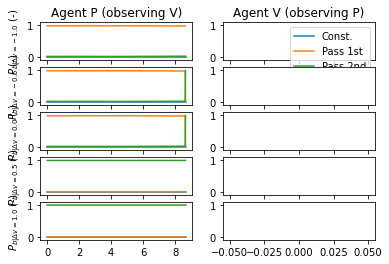

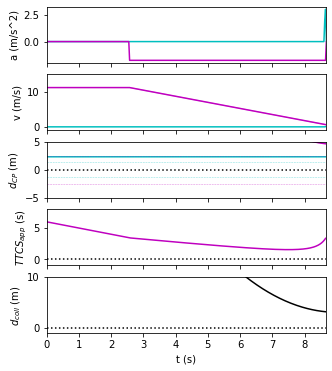


25_4 variation 1/1:
Initialising and running simulation took 0.648 s.


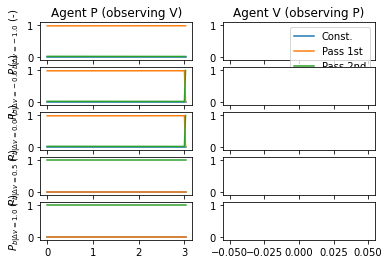

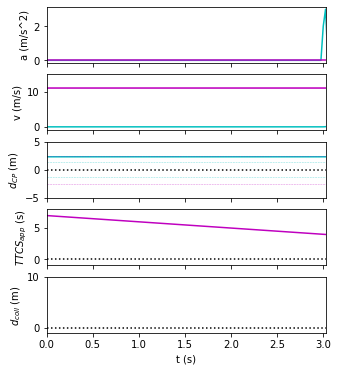


25_4_y variation 1/1:
Initialising and running simulation took 0.658 s.


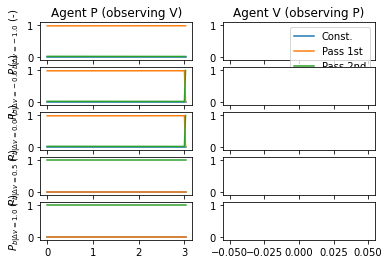

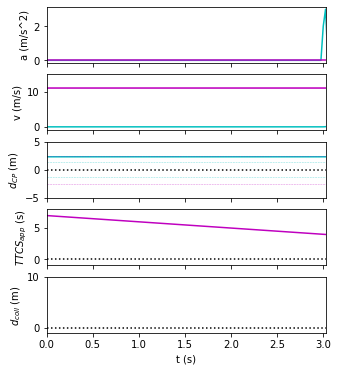


25_5 variation 1/1:
Initialising and running simulation took 0.669 s.


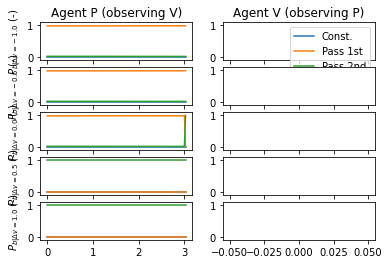

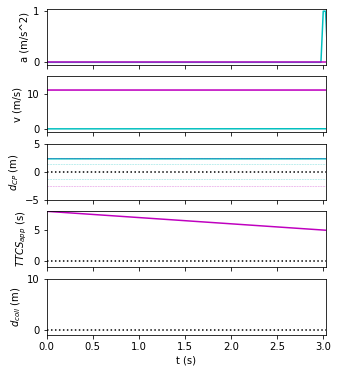


25_5_y variation 1/1:
Initialising and running simulation took 0.691 s.


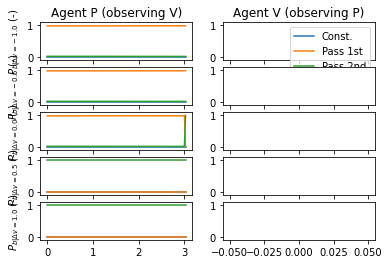

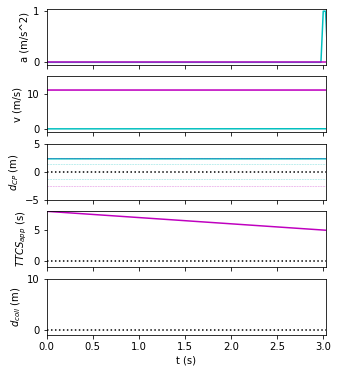


30_2 variation 1/1:
Initialising and running simulation took 0.936 s.


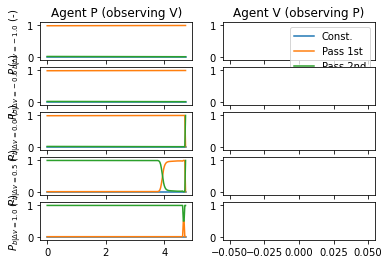

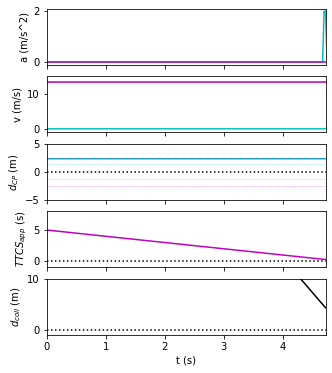


30_2_y variation 1/1:
Initialising and running simulation took 1.507 s.


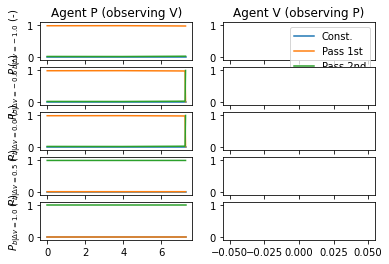

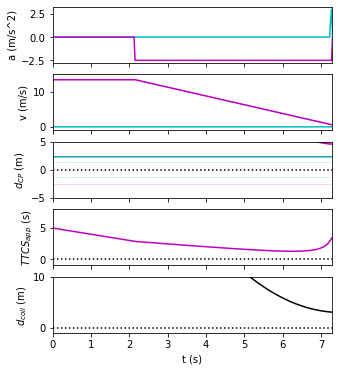


30_3 variation 1/1:
Initialising and running simulation took 1.239 s.


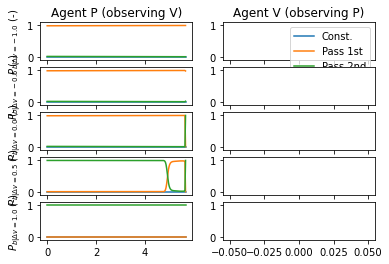

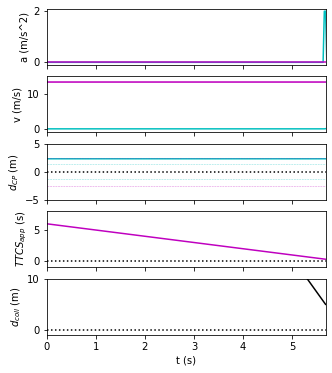


30_3_y variation 1/1:
Initialising and running simulation took 1.728 s.


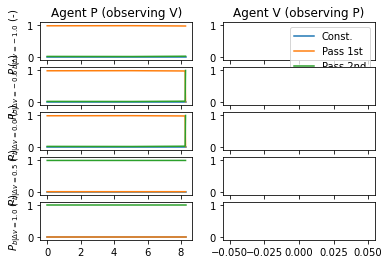

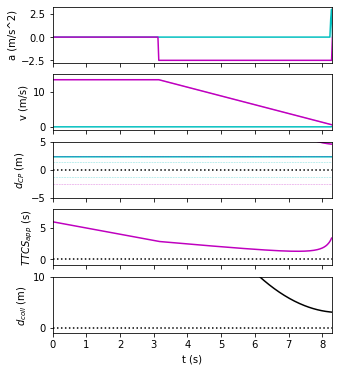


30_4 variation 1/1:
Initialising and running simulation took 0.657 s.


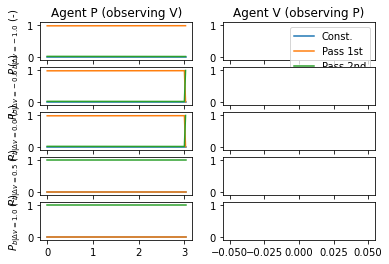

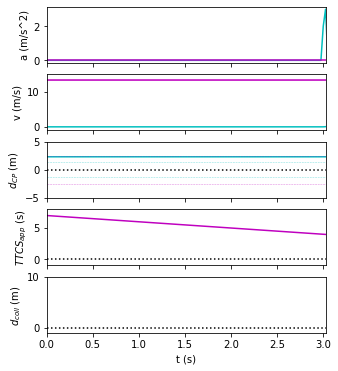


30_4_y variation 1/1:
Initialising and running simulation took 0.669 s.


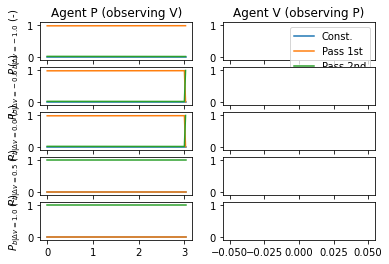

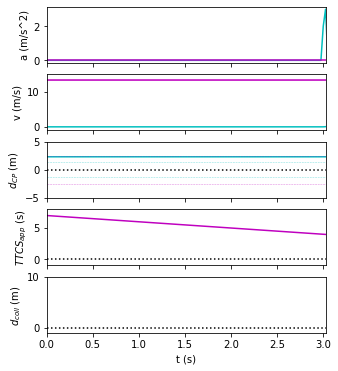


30_5 variation 1/1:
Initialising and running simulation took 0.623 s.


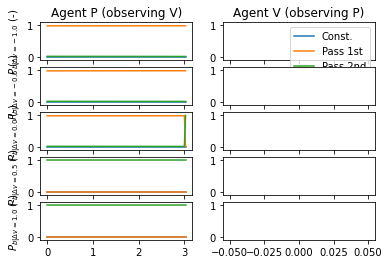

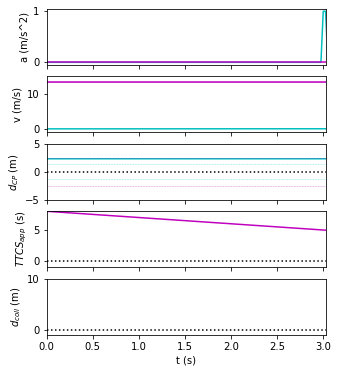


30_5_y variation 1/1:
Initialising and running simulation took 0.668 s.


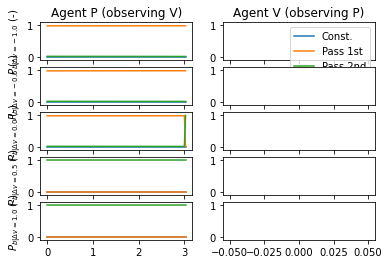

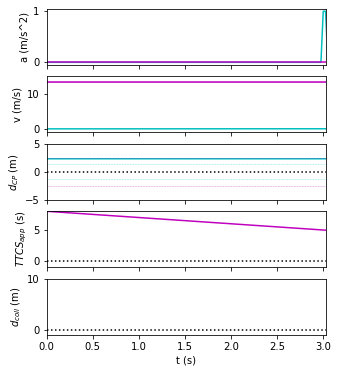


35_2 variation 1/1:
Initialising and running simulation took 0.955 s.


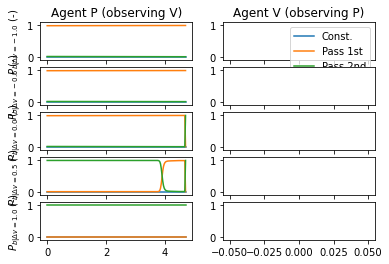

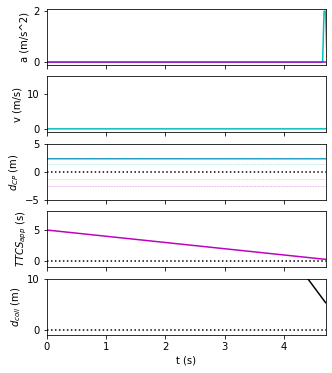


35_2_y variation 1/1:
Initialising and running simulation took 1.440 s.


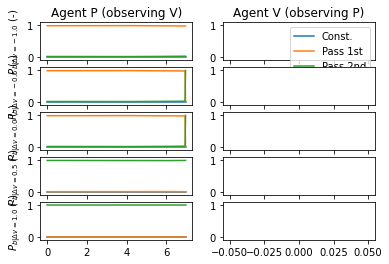

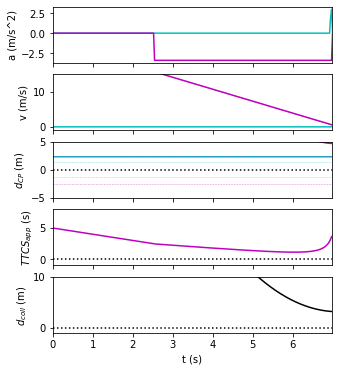


35_3 variation 1/1:
Initialising and running simulation took 1.279 s.


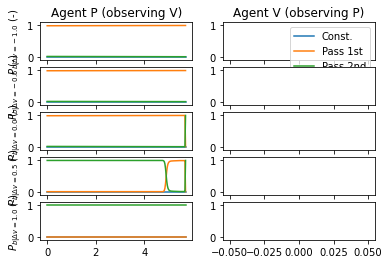

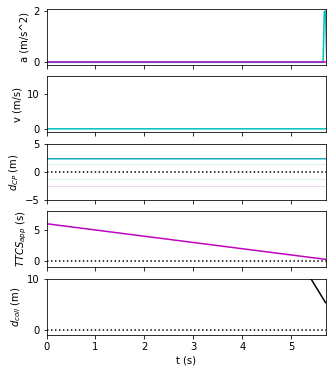


35_3_y variation 1/1:
Initialising and running simulation took 1.700 s.


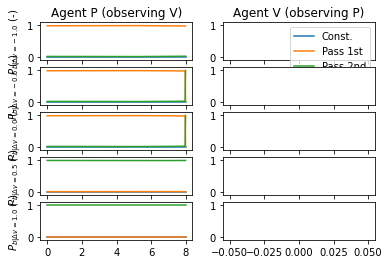

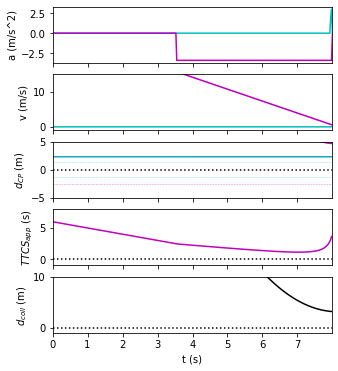


35_4 variation 1/1:
Initialising and running simulation took 0.676 s.


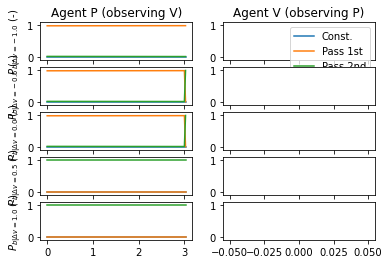

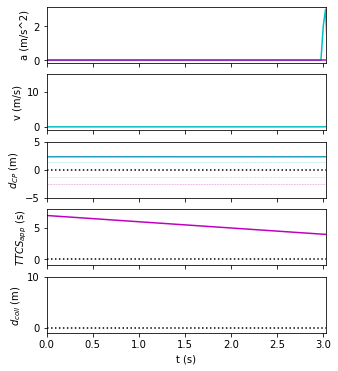


35_4_y variation 1/1:
Initialising and running simulation took 0.674 s.


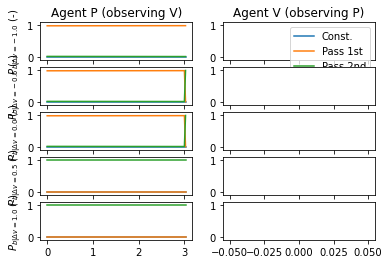

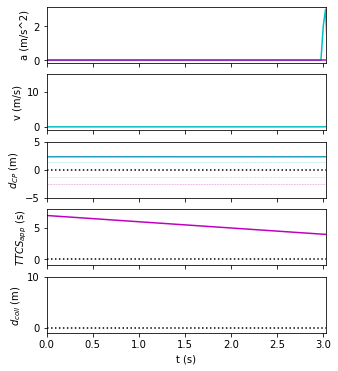


35_5 variation 1/1:
Initialising and running simulation took 0.686 s.


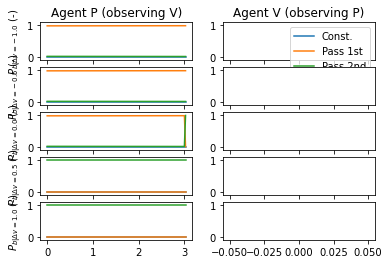

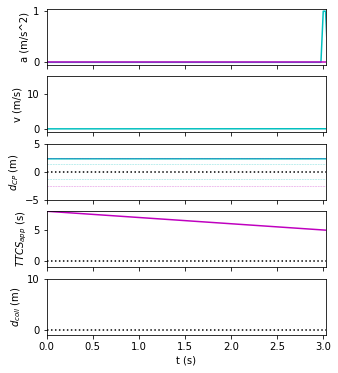


35_5_y variation 1/1:
Initialising and running simulation took 0.702 s.


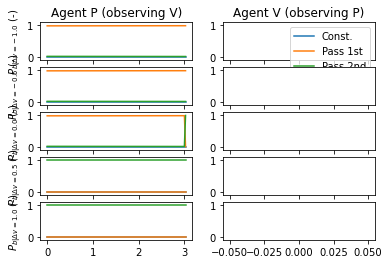

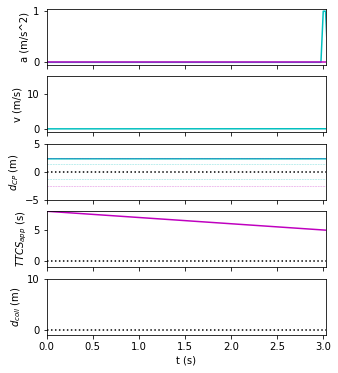

In [1]:
%run ../SCPaper/test_scpaper_scenario.py

In [2]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
parent_path = str(Path('.').absolute().parent)
if not (parent_path in sys.path):
    sys.path.append(parent_path)
    sys.path.append(parent_path + '/SCPaper')
print(sys.path)

# imports needed to run the simulations
import math
import copy
import numpy as np
import commotions
import sc_scenario
import sc_scenario_perception
from sc_scenario_helper import CtrlType
import sc_fitting



['C:\\GITHUB\\COMMOTIONSFramework\\diary notebooks', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\python39.zip', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\DLLs', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64', '', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\Pythonwin', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tragma\\.ipython', 'C:\\GITHUB\\COMMOTIONSFramework']


## Unit tests, reproducing earlier results

Also rerunning the same set of tests as in 2021-12-13 - getting the same results as then for all of the simulations below.

### Basics - there are some differences

Just the base model, no interaction.

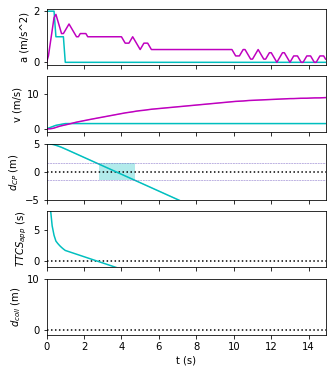

In [3]:
NAMES = ('P', 'V')
WIDTHS = (1.5, 1.5) # setting widths/lengths corresponding to the old default
LENGTHS = (1.5, 1.5) # setting sc_scenario.SHARED_PARAMS.d_C = 1.5
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [400, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 0))

optional_assumptions = sc_scenario.get_assumptions_dict(
        default_value = False, oVA = True, oBEo = False, oBEv = False, oAI = False, oEA = False)
sc_simulation = sc_scenario.SCSimulation(
        CTRL_TYPES, WIDTHS, LENGTHS, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = NAMES)
sc_simulation.run()
sc_simulation.do_plots(kinem_states = True)

Baseline kinematics, base model. 

Initial car distance 30 m:


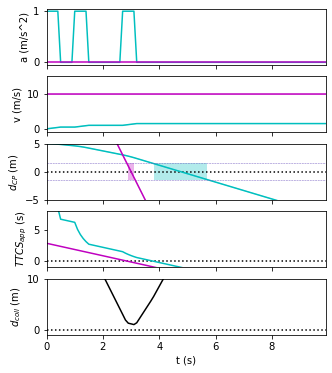

Initial car distance 40 m:


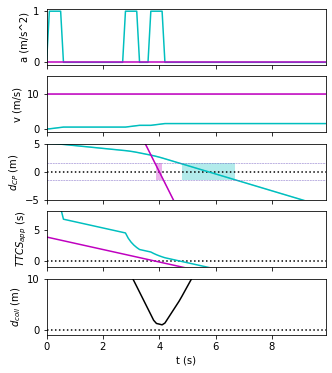

Initial car distance 50 m:


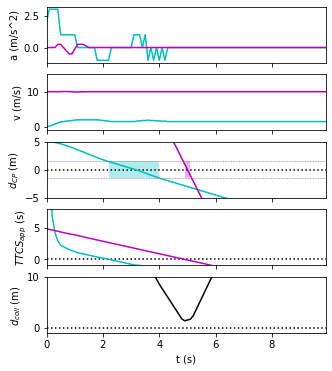

In [4]:
SPEEDS = np.array((0, 10))
PED_Y0 = -5
CONST_ACCS = (None, None)
AFF_VAL_FCN = True
optional_assumptions = sc_scenario.get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = False, oAI = False, oEA = False)
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)


def run_baseline_kinematics(dist0s = (30, 40, 50), 
                            plot_beh_probs = False, plot_beh_activs = False, 
                            plot_beh_accs = False, plot_looming = False, 
                            ped_snaps = None, veh_snaps = None):
    for dist0 in dist0s:
        INITIAL_POSITIONS = np.array([[0, PED_Y0], [dist0, 0]])
        sc_simulation = sc_scenario.SCSimulation(
                CTRL_TYPES, WIDTHS, LENGTHS, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
                end_time = 10, optional_assumptions = optional_assumptions,
                agent_names = NAMES, const_accs = CONST_ACCS, params = params,
                snapshot_times = (ped_snaps, veh_snaps))
        sc_simulation.run()
        print('Initial car distance %d m:' % dist0)
        sc_simulation.do_plots(kinem_states = True, beh_probs = plot_beh_probs,
                              beh_activs = plot_beh_activs, beh_accs = plot_beh_accs,
                              looming = plot_looming)

run_baseline_kinematics()

And here is the same after restoring the pre-safety-margin settings. 

Initial car distance 30 m:


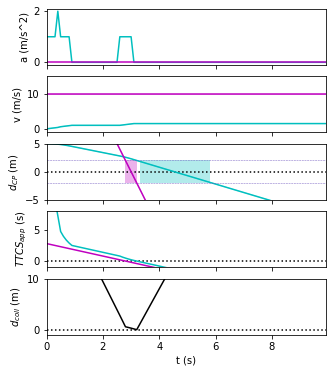

Initial car distance 40 m:


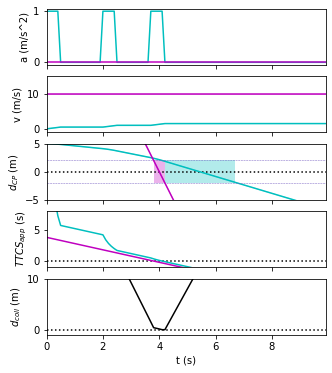

Initial car distance 50 m:


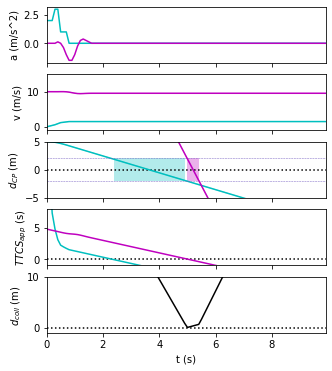

In [5]:
WIDTHS = (2, 2) # setting widths/lengths corresponding to the old default
LENGTHS = (2, 2) # setting sc_scenario.SHARED_PARAMS.d_C = 2
params.T_s = 0
params.D_s = 0
run_baseline_kinematics()

### The `oBEo` etc sequence


Turning on oBEo:
Initial car distance 40 m:


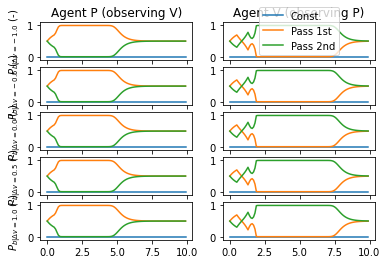

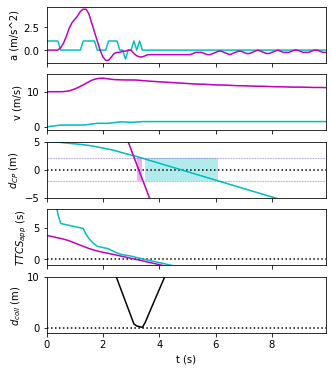

Turning on oBEv:
Initial car distance 40 m:


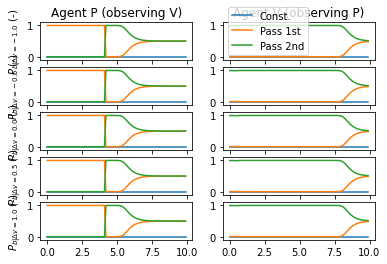

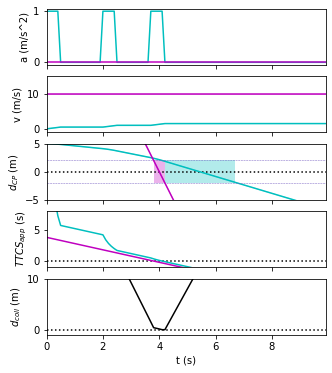

Turning on oAI:
Initial car distance 40 m:


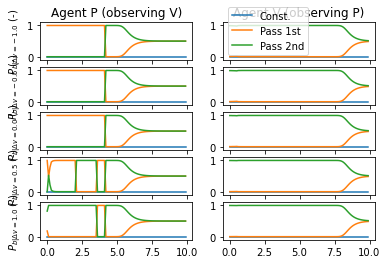

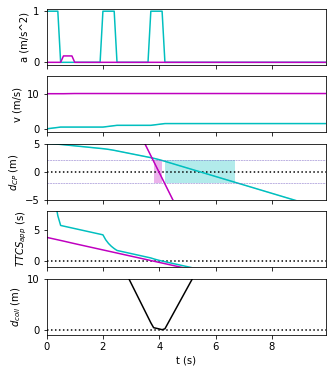

In [6]:
params.T_O1 = 0.1 
params.T_Of = 0.5
params.sigma_O = 0.01
params.beta_V = 160

def run_oBEo_etc_seq():
    global optional_assumptions
    print('Turning on oBEo:')
    optional_assumptions = sc_scenario.get_assumptions_dict(
            default_value = False, oVA = AFF_VAL_FCN, oBEo = True)
    run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)
    print('Turning on oBEv:')
    optional_assumptions = sc_scenario.get_assumptions_dict(
            default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True)
    run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)
    print('Turning on oAI:')
    optional_assumptions = sc_scenario.get_assumptions_dict(
            default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True, oAI = True)
    run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)
run_oBEo_etc_seq()

And turning off the new access order implication calculations, yielding the old results, familiar from 2021-11-29b and earlier.

Base model (with old access order implication calculations):
Initial car distance 40 m:


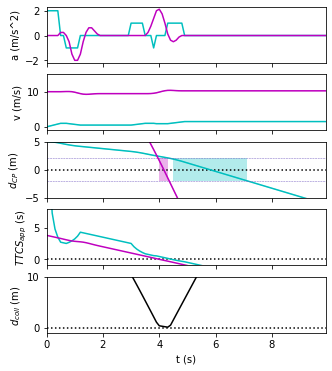

Turning on oBEo:
Initial car distance 40 m:


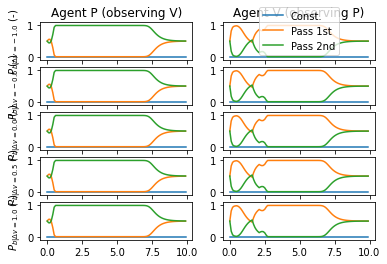

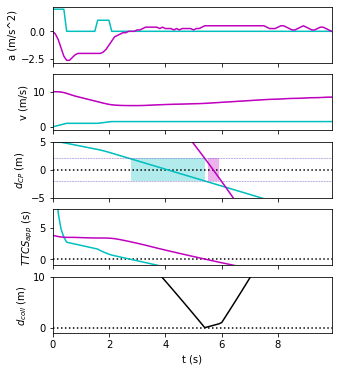

Turning on oBEv:
Initial car distance 40 m:


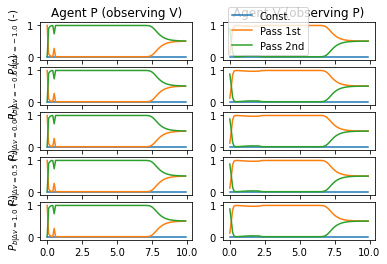

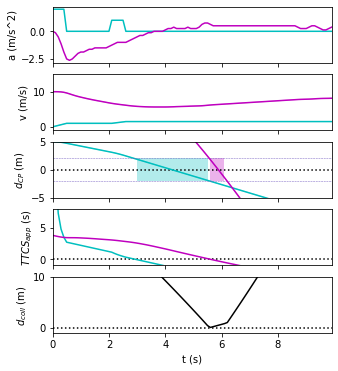

Turning on oAI:
Initial car distance 40 m:


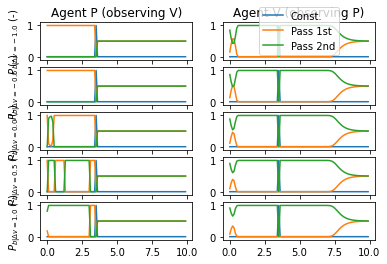

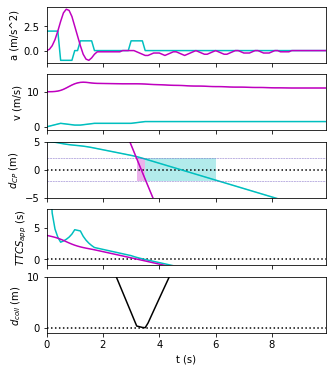

In [7]:
import sc_scenario_helper
sc_scenario_helper.NEW_ACC_IMPL_CALCS = False

print('Base model (with old access order implication calculations):')
optional_assumptions = sc_scenario.get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN)
run_baseline_kinematics(dist0s = (40,))
run_oBEo_etc_seq()

## Next steps

* Implementing a metric for measuring crossing initiation time in the HIKER scenarios.
* Testing some model parameterisations from the combined fittings on the HIKER scenarios.